<a href="https://colab.research.google.com/github/anuvind-saj/tensorflow-tutorials/blob/AI_ML/freeCodeCamp/Tensorflow_Tutorial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [ ]:
train_images[0:]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

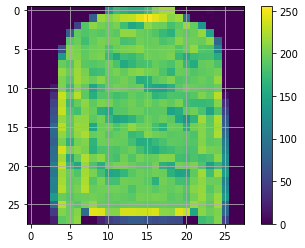

In [ ]:
plt.figure()
plt.imshow(train_images[234])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
# Making values in range 0-1. Neural network initial weights are in range of -1 to 1. So any value comparable to this will reduce workload of the neural network
train_images = train_images / 255.0
# Do it for test images as well
test_images = test_images / 255.0

In [ ]:
# Neural network architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
]) 

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=1)  # we pass the data, labels and epochs and watch the magic!

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2330 - accuracy: 0.9123


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8809
Test accuracy: 0.8809000253677368


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([7.5549707e-07, 9.9798482e-11, 1.9863025e-09, 4.5873541e-09,
       1.2838092e-09, 3.3519165e-05, 1.5849898e-06, 3.8968259e-03,
       1.9180582e-09, 9.9606735e-01], dtype=float32)

In [ ]:
class_names[np.argmax(predictions[123])]

'Ankle boot'

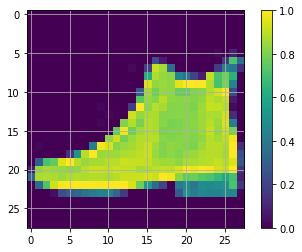

In [ ]:
plt.figure()
plt.imshow(test_images[123])
plt.colorbar()
plt.grid(True)
plt.show()